# Multiple Linear Regression - *Boston Housing dataset*

In the previous notebook we have seen how to predict the average value of a dwelling according to its number of rooms, through the implementation of a **Simple Linear Regression** model, for the *Boston Housing Dataset*. We can generalize the **Simple Linear Regression** model by adding more variables and thus obtaining the **Multiple Linear Regression** model, in such a way that we are providing more information to the model, so it can improve the quality of its predictions. In particular, we are going to predict the median value of a home in Boston Housing Dataset according to the *number of rooms (RM)* and, additionally, to the *percentage of lower status population (LSTAT)* and *pupil-teacher ratio (PTRATIO)*.

In the same way as the code corresponding to **Simple Linear Regression**, the necessary libraries are imported and the data is loaded:

In [0]:
from sklearn.datasets import load_boston

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

boston_dataset = load_boston()

X = boston_dataset.data
Y = boston_dataset.target

n, p = X.shape

## 1. Exploratory Data Analysis

This brief exploratory analysis is based on checking the correlation between the various attributes used to predict the mean value of the house, as well as verifying if there is any missing value in the dataset. To perform both tasks, it is necessary to import the *pandas* library, useful in data manipulation and analysis, and the *seaborn* visualization library. Then, a 'reduced' dataset is created selecting only the involved attributes, in such a way that their correlation can be observed in a correlation matrix:

Number of missing values for each attribute: 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


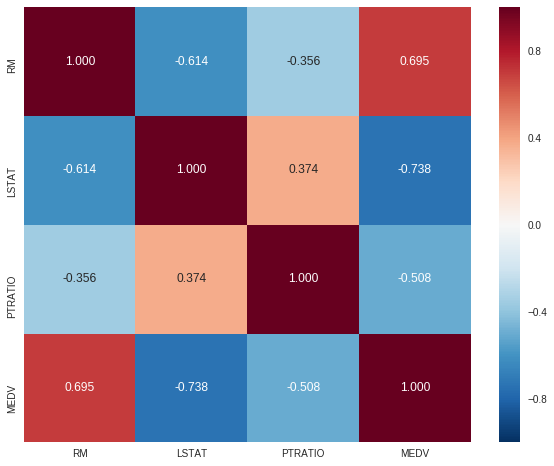

In [0]:
import pandas as pd  
import seaborn as sb

rep = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
rep['MEDV'] = boston_dataset.target  # Add the target to the new dataset

print("Number of missing values for each attribute: \n", rep.isnull().sum())  # Check if any field in the dataset is missing

rep = rep.loc[:, ['RM','LSTAT','PTRATIO','MEDV']]  # Select only the concerned attributes

corrmat = rep.corr()  # Pandas correlation matrix
plt.figure(figsize=(10, 8))  # Resize the heatmap before plotting
sb.heatmap(corrmat, annot=True, fmt=".3f", cmap='RdBu_r')  # Display the first 3 decimal positions

At first, we can see that there are no missing data in the *Boston Housing dataset*. Looking at the correlation matrix, we can observe that all al the attributes seem to be more positively or negatively correlated, as they are closer to +1 or -1, respectively. We can draw several conclusions, for example: The lower the percentage of lower status population (LSTAT), the higher the price of a house on average (MEDV); or the greater the number of rooms (RM), the lower the percentage of lower status population (LSTAT).

## 2. Ordinary Least Squares

The **Ordinary Least Squares** method can be applied, as **Multiple Linear Regression** problems can also be solved with this technique, as there are no big differences at code level between the two techniques. Therefore, we continue obtaining the weights that make the cost function minimum when its derivate is equal to 0, now taking into account LSTAT and PTRATIO, through the expression:

$W = (X^TX)^{-1}X^TY$


In [0]:
Xamp = X[:,[5, 10, 12]]

 # With a 1s column vector on the left, we extend the matrix composed of the three variables that determine MEDV prediction.
id_Xamp = np.hstack((np.ones((n,1)), Xamp))

Y = Y[:, np.newaxis]  # We avoid losing the second dimension of the Y numpy array

W = np.linalg.inv(id_Xamp.T @ id_Xamp) @ id_Xamp.T @ Y
print(W)

[[18.56711151]
 [ 4.51542094]
 [-0.93072256]
 [-0.57180569]]


Thus, the ***Ordinary Least Squares*** method tells us that weights are: $W_0 = 18.56711151$, $W_{RM} = 4.51542094$, $W_{PTRATIO} = -0.93072256$ and $W_{LSTAT} = -0.57180569$. This indicates that the increase of 1 room raises the medium price by \$4.5k times, or that decreasing the pupil-teacher ratio by 1 makes the house almost \$1k cheaper.

At this point, **MSE** between the prediction $Y_{pred}$ and the original $Y$ can be implemented and then calculated:

In [0]:
  # Analytic expression for RM (medium value), according to LSTAT, PTRATIO and RM
regressionFunction = lambda LSTAT, PTRATIO, RM:  -0.57180569*LSTAT -0.93072256*PTRATIO + 4.51542094*RM + 18.56711151

  # But better than the analytic expression, we use the matrix multiplication to obtain Ypred: array of predictions of RM
Ypred = id_Xamp @ W

MSE = lambda a, b: np.mean(np.power(a-b, 2))
print("MSE: %.8f" % MSE(Ypred, Y))

MSE: 27.13040576


## 3. Scikit-learn's LinearRegression module

As we established in the case of **Simple Linear Regression**, using the *Sklearn* library simplifies the implementation and training of various models, as is also the case of the **Multiple Linear Regression** model. Therefore, we are going to import the modules and functions needed, train the model with the three attributes that are involved in the output and calculate the **MSE** to compare it with the **MSE** in the previous section:

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

multipleLRModel = linear_model.LinearRegression()
multipleLRModel.fit(Xamp, Y)  # Train the model with X = RM + PTRATIO + LSTAT, and Y

print("Weights RM, PTRATIO and LSTAT (respectively): ", multipleLRModel.coef_, "Intercept: ", multipleLRModel.intercept_)

Ypred = multipleLRModel.predict(Xamp)

print("MSE: %.8f" % mean_squared_error(Y, Ypred))

Weights RM, PTRATIO and LSTAT (respectively):  [[ 4.51542094 -0.93072256 -0.57180569]] Intercept:  [18.56711151]
MSE: 27.13040576


As we can see, using ***Ordinary Least Squares*** and **Multiple Linear Regression** with *Sklearn* two identical values are obtained for the **MSE**.